In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Improving the model

## Bounded growth for the rainbowfish

**Problem statement:**

An aquarium owner is breeding a population of rainbowfish. He starts with 30 rainbowfish and expects to sell 20 rainbowfish every day. The aquarium is large enough for a healthy population of 750. Predict the development of the size of the population.

## Mathematical model

In the mathematical model, the growth rate, which is now a constant $0.7$, should depend on the size of the population. Thus, the differential equation now becomes:

$$
\dfrac{dP}{dt}=0.7\left(1-\dfrac{P(t)}{750}\right)\,P(t)-20.
$$

## Calculation

The differential equation has two equilibrium points: $P_{e_1}$ and $P_{e_2}$:

In [17]:
# Define the symbolic variable
P = sp.symbols('P')

# Define the differential equation
dP = 0.7 * (1 - P / 750) * P - 20

points = sp.solve(dP, P)
print(points)

[29.7516421886578, 720.248357811342]


The graph of $\dfrac{dP}{dt}$ as a function of $P$:

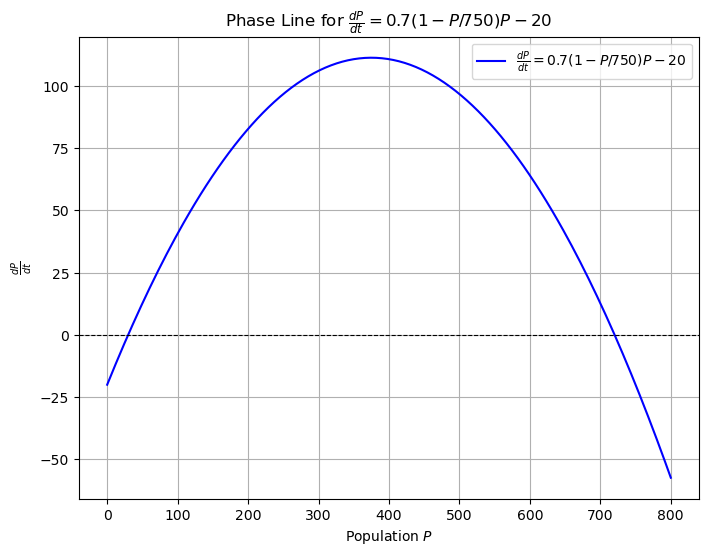

In [18]:
# Define the differential equation function
def dP_dt(P):
    return 0.7 * (1 - P / 750) * P - 20

# Define the range of P values
P_values = np.linspace(0, 800, 200)  # Adjust the range and number of points as needed

# Calculate dP/dt for the range of P values
dP_values = dP_dt(P_values)

# Plot the phase line
plt.figure(figsize=(8, 6))
plt.plot(P_values, dP_values, label='$\\frac{dP}{dt} = 0.7(1 - P / 750)P - 20$', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Zero line for reference
plt.xlabel('Population $P$')
plt.ylabel('$\\frac{dP}{dt}$')
plt.title('Phase Line for $\\frac{dP}{dt} = 0.7(1 - P / 750)P - 20$')
plt.grid(True)
plt.legend()
plt.show()


$P$ increases the most if $\dfrac{dP}{dt}$ has a maximum at $P$:

In [23]:
# Coefficients of the quadratic equation
a = -0.7 / 750
b = 0.7

# Compute the vertex
P_vertex = -b / (2 * a)

# Evaluate the differential equation at the vertex to find the maximum value
max_dP_dt = dP_dt(P_vertex)

print("The optimal value of P is:", P_vertex)
print("The maximum value of dP/dt is:", max_dP_dt)


The optimal value of P is: 375.0
The maximum value of dP/dt is: 111.25


$P_{e1}$ is unstable equilibrium point, and $P_{e2}$ is stable.

## Validation

For this initial value problem $\displaystyle \lim_{t \rightarrow \infty} P(t)$ equals $720.2$, because in that equilibrium point, the increase by the new fish exactly balances the 20 fish sold every day, and the equilibrium point is stable.

### Direction field

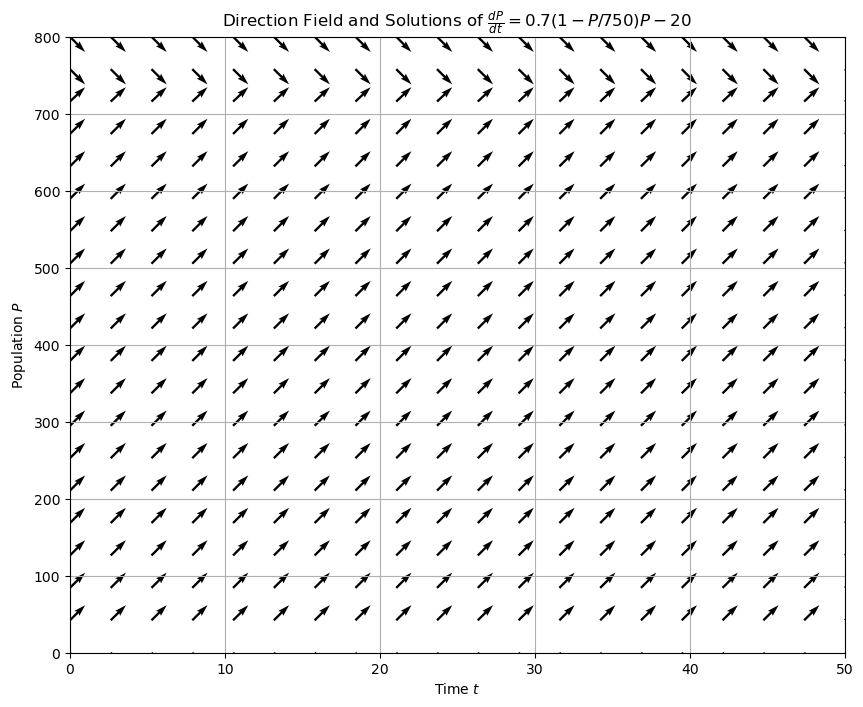

In [11]:
# Define the differential equation function
def dP_dt(t, P):
    return 0.7 * (1 - P / 750) * P - 20

# Define the range of P and t for the direction field
P_range = np.linspace(0, 800, 20)  # Population range from 0 to 100
t_range = np.linspace(0, 50, 20)   # Time range from 0 to 10

# Create a meshgrid of P and t values for the direction field
P, t = np.meshgrid(P_range, t_range)

# Calculate dP/dt for the meshgrid points
# Compute the slopes (dP/dt) at each point in the grid
dP = dP_dt(t, P)

# Normalize the dP values for better visualization
dP_normalized = dP / np.sqrt(1 + dP**2)

# Plotting the direction field and solutions together
plt.figure(figsize=(10, 8))

# Plot the direction field
plt.quiver(t, P, np.ones_like(dP_normalized), dP_normalized, color='black')

# Add labels, title, legend, and grid
plt.xlabel('Time $t$')
plt.ylabel('Population $P$')
plt.title('Direction Field and Solutions of $\\frac{dP}{dt} = 0.7(1 - P / 750)P - 20$')
plt.xlim([0,50])
plt.ylim([0,800])
plt.grid(True)
plt.show()


It takes between 9 to 50 days for the population to reach 720 fish with the initial condition $P(0) = 30$. It is difficult to say by just looking at the direction field.

## How long does breeding rainbowfish take?

**Problem statement:**

How long does it take for the rainbowfish population to get into its equilibrium state?

The differential equation has two equilibrium solutions, namely an unstable one of approximately $29.75$ and a stable one of approximately $720.25$. The second one is relevant for the new problem.

How long does it take to reach that equilibrium? Mathematically, the answer is: "infinitely long". The nearer $P$ gets to the equilibrium, the lower the value of the derivative (but it stays positive), so the growth will keep slowing down, never reaching zero growth, and $P$ will never reach its equilibrium value.

Luckily, living fish come in units, so we rephrase the question:

How long does it take for the rainbowfish population to reach the last integer before the mathematical equilibrium?

This means that we want to find time $t_\text{eq}$ such that $P(t_{\text{eq}})=720$.

## Calculation (Euler's method)

Solution for dP/dt = 0.7(1 - P / 750)P - 20


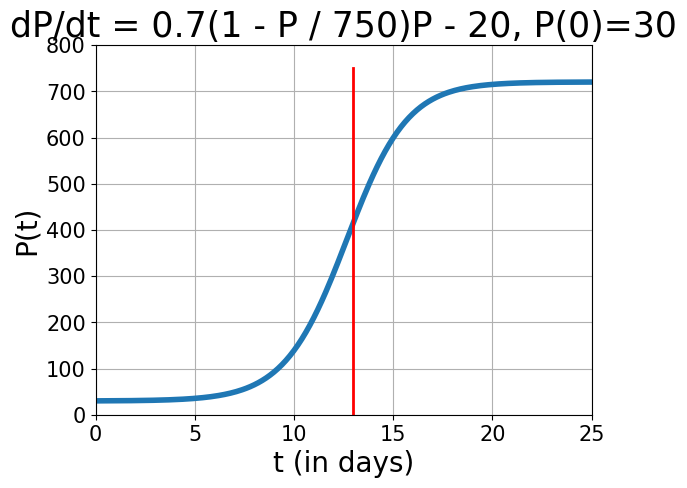

In [19]:
# Program      : Euler's method
# Author       : MOOC team Mathematical Modelling Basics
# Created      : April, 2017

# import numpy as np
# import matplotlib.pyplot as plt

print("Solution for dP/dt = 0.7(1 - P / 750)P - 20")	# in Python 2.7: use no brackets

# Initializations

Dt = 0.1                                # timestep Delta t
P_init = 30                             # initial population 
t_init = 0                              # initial time
t_end = 25                               # stopping time
n_steps = int(round((t_end-t_init)/Dt)) # total number of timesteps

t_arr = np.zeros(n_steps + 1)           # create an array of zeros for t
P_arr = np.zeros(n_steps + 1)           # create an array of zeros for P
t_arr[0] = t_init                       # add the initial P to the array
P_arr[0] = P_init                       # add the initial t to the array

# Euler's method

for i in range (1, n_steps + 1):
    P = P_arr[i-1]
    t = t_arr[i-1]
    dPdt = 0.7*(1 - P / 750)*P - 20                        # calculate the derivative 
    P_arr[i] = P + Dt*dPdt              # calculate P on the next time step
    t_arr[i] = t + Dt                   # adding the new t-value to the list

# Plot the results

fig = plt.figure()                      # create figure
plt.plot(t_arr, P_arr, linewidth = 4)   # plot population vs. time
plt.plot([13,13],[0,750],'r',linewidth=2)
plt.title('dP/dt = 0.7(1 - P / 750)P - 20, P(0)=30', fontsize = 25)  
plt.xlabel('t (in days)', fontsize = 20)
plt.ylabel('P(t)', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)                          # show grid 
plt.axis([0, 25, 0, 800])                # define the axes
plt.show()                              # show the plot
# save the figure as .jpg
# fig.savefig('Rainbowfish.jpg', dpi=fig.dpi, bbox_inches = "tight")

## Calculation (accuracy)

### Error of an approximation with Euler's method

For differential equation $\dfrac{dy}{dt} = f(t,y(t))$ (and an initial condition), the exact solution at a specific time $t$ is $y(t)$. With Euler's method and stepsizes $\Delta t$ and $2\Delta t$, that exact solution can be approximated by $w_{\Delta t}$ and $w_{2\Delta t}$, respectively. Then $E_{\Delta t}$, the error in $w_{\Delta t}$, can be estimated as the difference between $w_{\Delta t}$ and $w_{2\Delta t}$:

$
E_{\Delta t} \ =\ y(t) - w_{\Delta t} \ \approx \ w_{\Delta t} - w_{2\Delta t}.
$

There we were looking at differences in $P$: vertical differences between the different curves in the graph.

## Validation

A stepsize that gives the results that are accurate within 20 fish is $\Delta t = 1/32$ because then the value at the steepest part of the function (at $t = 13$) is correct within $20$ fish. 

An approximation of the value of $t_{\text{eq}}$ is: $24.63$.

We can now state that for our problem, the rainbowfish population is close to the equilibrium size within $25$ days.